In [1]:
import os
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from voltagebudget.exp import sparse_sweep_A
from voltagebudget.neurons import adex
from voltagebudget.util import read_results
from voltagebudget.util import read_stim
from voltagebudget.util import read_args
from voltagebudget.util import read_modes
from voltagebudget.util import nearest_spike
from voltagebudget.util import write_spikes
from voltagebudget.util import locate_firsts
from voltagebudget.util import filter_spikes
from voltagebudget.util import budget_window
from voltagebudget.util import locate_peaks
from voltagebudget.util import write_spikes
from voltagebudget.util import write_voltages
from voltagebudget.util import mad
from voltagebudget.util import mae
from voltagebudget.util import select_n
from voltagebudget.util import score_by_group
from voltagebudget.util import score_by_n
from voltagebudget.util import find_E
from voltagebudget.util import find_phis

# Config

In [10]:
stim = "../../data/stim3.csv"
mode = "regular"

N = 10
time = 1.0
time_step = 1e-5

E_0 = 0
f = 8
A_max = 0.05e-9
T = 0.125

w_in = (3e-10, 3e-9)

In [11]:
stim_data = read_stim(stim)
ns_stim = np.asarray(stim_data['ns'])
ts_stim = np.asarray(stim_data['ts'])

# Run

In [ ]:
results = sparse_sweep_A("testing",
                   stim,
                   E_0,
                   A_0=0.00e-9,
                   A_max=A_max,
                   Z=0.0,
                   n_samples=10,
                   t=0.4,
                   t_pad=0,
                   d=-2e-3,
                   w=2e-3,
                   T=T,
                   f=f,
                   N=250,
                   n_cycles=2,
                   mode='regular',
                   sigma=0,
                   sparse_threshold=.1,
                   g_l=None,
                   V_l=None,
                   w_in_0=w_in[0],
                   w_in_max=w_in[1],
                   no_lock=False,
                   verbose=True,
                   save_only=False,
                   save_spikes=False,
                   save_traces=False,
                   seed_value=42)

>>> Setting mode.
>>> Importing stimulus from ../../data/stim3.csv.
>>> Creating reference spikes.
>>> Locking on first spike. E was [0.02767].
>>> phi_w 0.28048139211249645, phi_E -1.3908458995972734
>>> 940 spikes in the analysis window.
>>> Running A 0.000000000000000 (1/10).
>>> (bias_in 5e-11) -> (bias_adj 5e-11)
>>> (A 0.000000000000)  ->  (N spks, 3.76, mae 0.00000, mad, 0.03256)
>>> Running A 0.000000000005556 (2/10).
>>> (bias_in 5e-11) -> (bias_adj 5e-11)


In [13]:
results.keys()

dict_keys(['N', 'rank', 'variances_pop', 'errors_pop', 'n_spikes_pop', 'variances', 'errors', 'n_spikes', 'n_spikes_ref', 'V_b', 'V_osc', 'V_comp', 'V_free', 'V_osc_ref', 'V_comp_ref', 'As', 'biases', 'phis_E', 'phis_w'])

# Visualize

Text(0.5, 0, 'Pop. variance (ms)')

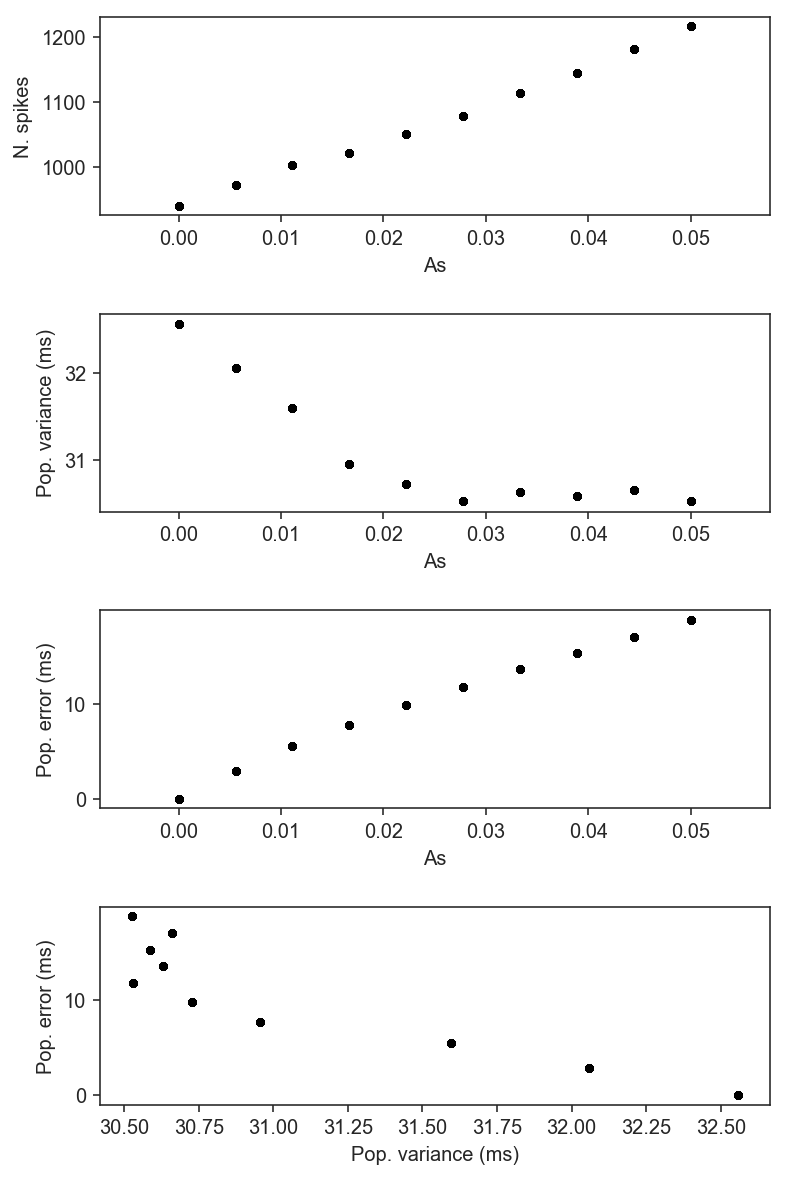

In [42]:
# Plotz
fig = plt.figure(figsize=(6, 10))
grid = plt.GridSpec(4, 1, wspace=0.3, hspace=0.5)

# Spikes
plt.subplot(grid[0, 0])
plt.scatter(
    np.asarray(results["As"])*1e9, 
    np.asarray(results["n_spikes_pop"]), 
    color="black", 
    alpha=1, 
    s=10, 
    label="Bandit")
plt.ylabel("N. spikes")
plt.xlabel("As")

plt.subplot(grid[1, 0])
plt.scatter(
    np.asarray(results["As"])*1e9, 
    np.asarray(results["variances_pop"])*1e3, 
    color="black", 
    alpha=1, 
    s=10, 
    label="Bandit")
plt.ylabel("Pop. variance (ms)")
plt.xlabel("As")

plt.subplot(grid[2, 0])
plt.scatter(
    np.asarray(results["As"])*1e9, 
    np.asarray(results["errors_pop"])*1e3, 
    color="black", 
    alpha=1, 
    s=10, 
    label="Bandit")
plt.ylabel("Pop. error (ms)")
plt.xlabel("As")

plt.subplot(grid[3, 0])
plt.scatter(
    np.asarray(results["variances_pop"])*1e3, 
    np.asarray(results["errors_pop"])*1e3, 
    color="black", 
    alpha=1, 
    s=10, 
    label="Bandit")
plt.ylabel("Pop. error (ms)")
plt.xlabel("Pop. variance (ms)")